In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sql.connect("database.sqlite")
conn

In [3]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

In [4]:
q = "select * from salaries"
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


Question:1 What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [5]:
q = '''select jobtitle, avg(TotalPayBenefits) as Avg_TotalPayBenefits from salaries
    where jobtitle != 'Not Provided' and  jobtitle != 'Not provided'
    group by jobtitle'''
sql_query(q)

,JobTitle,Avg_TotalPayBenefits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2153,X-RAY LABORATORY AIDE,52705.880385
2154,X-Ray Laboratory Aide,69521.123200
2155,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2156,Youth Comm Advisor,60118.550000


Question:2 Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [7]:
q = '''select Year, JobTitle, count(*) as Employee_Count from salaries
    where JobTitle != 'Not Provided' and JobTitle != 'Not provided'
    group by Year, JobTitle
    order by Year, Employee_Count desc'''
sql_query(q)

,Year,JobTitle,Employee_Count
0,2011,TRANSIT OPERATOR,2388
1,2011,SPECIAL NURSE,1402
2,2011,REGISTERED NURSE,1219
3,2011,CUSTODIAN,796
4,2011,FIREFIGHTER,794
...,...,...,...
4131,2014,"Administrator, DPH",1
4132,2014,Administrative Hearing Sup,1
4133,2014,"Adm, SFGH Medical Center",1
4134,2014,Acupuncturist,1


Question:3 What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [7]:
q = '''select distinct(EmployeeName) from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
'''
sql_query(q)

,EmployeeName
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
110804,Afakasi O Afakasi
110805,Kenneth Mackey
110806,Mark W Mcclure
110807,Charlene D Mccully


Question:4 Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [8]:
q = '''select EmployeeName, TotalPayBenefits from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    order by TotalPayBenefits desc'''
sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
...,...,...
148643,Roy I Tillery,0.00
148644,Timothy E Gibson,-2.73
148645,Mark E Laherty,-8.20
148646,David P Kucia,-33.89


Question:5 Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [9]:
q = '''select JobTitle, EmployeeName, TotalPayBenefits from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    and JobTitle = 'Firefighter'
    and TotalPaybenefits > 125000 
    and TotalPaybenefits < 150000'''
sql_query(q)

,JobTitle,EmployeeName,TotalPayBenefits
0,Firefighter,Randall Henderson,147912.75
1,Firefighter,Virginia Cheung,147862.14
2,Firefighter,Travis Hemenez,147664.12
3,Firefighter,Gail Readdie,147452.17
4,Firefighter,Gregory Ginotti,147216.47
...,...,...,...
110,Firefighter,Stephen J Kloster,126784.13
111,Firefighter,Jeffrey D Ryan,126687.13
112,Firefighter,Jovan R Blake,126169.62
113,Firefighter,Dino M Cafferata,125680.52


Question:6 How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')

In [10]:
q = '''select count(EmployeeName), OvertimePay, OtherPay from salaries
    where OvertimePay == '0' and OtherPay == '0'
    and EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    '''
sql_query(q)

,count(EmployeeName),OvertimePay,OtherPay
0,34655,0,0


Question:7 Show top 10 employees having (overtimepay+OtherPay) in bar plot? exclude ('Not Provided', 'Not provided')

In [11]:
q = '''select EmployeeName, OvertimePay, OtherPay, (OvertimePay + OtherPay) as TotalExtraPay from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    order by TotalExtraPay desc
    limit 10
    '''
sql_query(q)

,EmployeeName,OvertimePay,OtherPay,TotalExtraPay
0,NATHANIEL FORD,0.00,400184.25,400184.25
1,GARY JIMENEZ,245131.88,137811.38,382943.26
2,David Shinn,0.00,342802.63,342802.63
3,CHRISTOPHER CHONG,56120.71,198306.90,254427.61
4,John Goldberg,0.00,245999.41,245999.41
5,Gary Altenberg,220909.48,13126.31,234035.79
6,Khoa Trinh,146415.32,78057.41,224472.73
7,ALSON LEE,89062.90,134426.14,223489.04
8,Brendan A Ward,53142.28,163495.64,216637.92
9,Whitney P Yee,196689.18,16622.66,213311.84


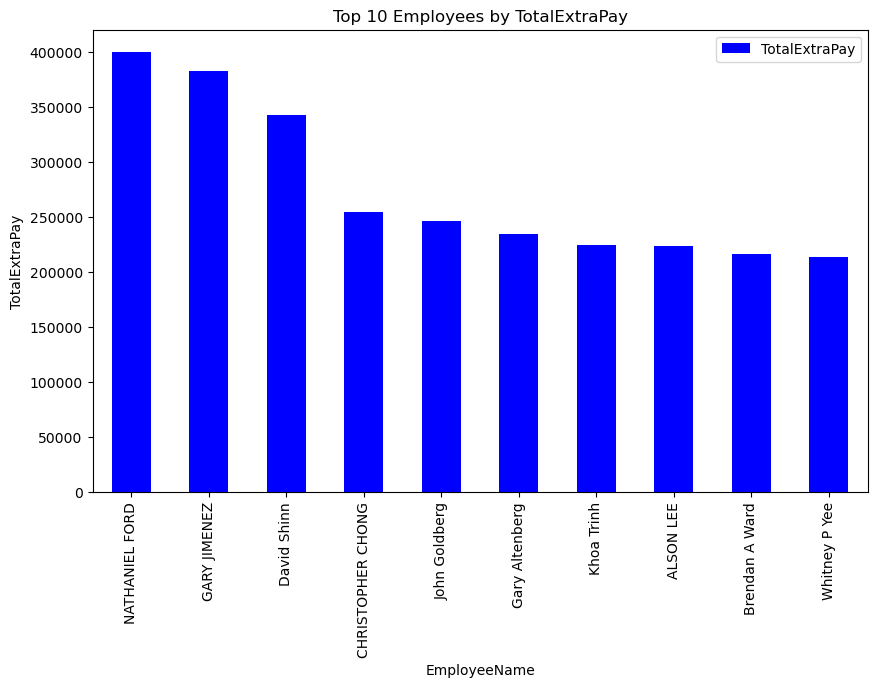

In [12]:
a = pd.read_sql_query(q, conn)
a.plot(kind='bar', x='EmployeeName', y='TotalExtraPay', color='blue', figsize=(10, 6))

plt.xlabel('EmployeeName')
plt.ylabel('TotalExtraPay')
plt.title('Top 10 Employees by TotalExtraPay')

plt.show()

Question:8 Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')

In [23]:
q = '''select EmployeeName, avg(BasePay) as Avg_BasePay, avg(OvertimePay) as Avg_OvertimePay, avg(OtherPay) as Avg_OtherPay from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    '''
sql_query(q)

,EmployeeName,Avg_BasePay,Avg_OvertimePay,Avg_OtherPay
0,NATHANIEL FORD,66055.45257,5065.821161,3648.761721


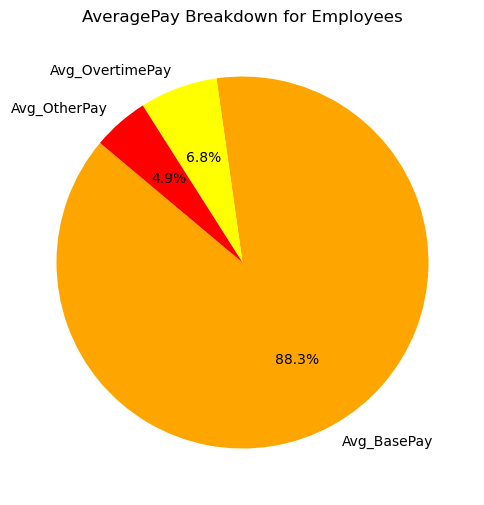

In [28]:
a = pd.read_sql_query(q, conn)

labels = ['Avg_BasePay', 'Avg_OvertimePay', 'Avg_OtherPay']
values = [a['Avg_BasePay'][0], a['Avg_OvertimePay'][0], a['Avg_OtherPay'][0]]

plt.figure(figsize=(6, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['orange', 'yellow', 'red'], startangle=140)

plt.title('AveragePay Breakdown for Employees')
plt.ylabel('')
plt.show()

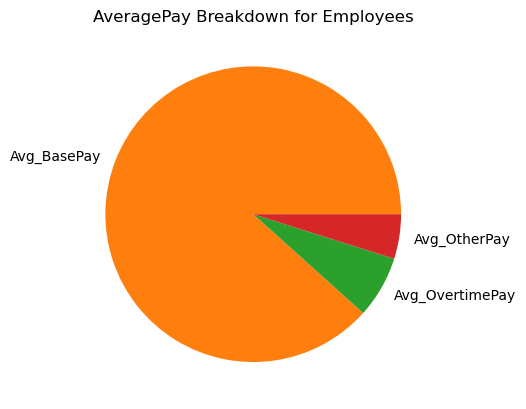

In [24]:
a = pd.read_sql_query(q, conn)

data = a.iloc[0]
data = pd.to_numeric(data, errors='coerce')
data.plot(kind='pie')

plt.title('AveragePay Breakdown for Employees')
plt.ylabel('')
plt.show()

Question:9 Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')

In [15]:
q = '''select JobTitle, avg(TotalPayBenefits) as "Average Pay" from salaries
    where JobTitle != 'Not Provided' and JobTitle != 'Not provided'
    group by JobTitle
    having avg(TotalPaybenefits) > 75000'''
sql_query(q)

,JobTitle,Average Pay
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


Question:10 Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10? exclude ('Not Provided', 'Not provided')

In [16]:
q = '''select count(EmployeeName) as "(EmployeeName)", JobTitle from salaries
    where EmployeeName != 'Not Provided' and EmployeeName != 'Not provided'
    group by JobTitle
    having count(EmployeeName) > 10'''
sql_query(q)

,(EmployeeName),JobTitle
0,83,ACCOUNT CLERK
1,48,ACCOUNTANT INTERN
2,93,ADMINISTRATIVE ANALYST
3,27,AIRPORT COMMUNICATIONS OPERATOR
4,13,AIRPORT ECONOMIC PLANNER
...,...,...
1151,30,Wire Rope Cable Maint Mechanic
1152,14,Worker's Comp Supervisor 1
1153,74,Worker's Compensation Adjuster
1154,26,X-RAY LABORATORY AIDE
